# Handwritten letter recognition with machine learning

## Data and preparing it

importing needed libraries (tensorflow and matplotlib)

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from PIL import Image

Dataset used in project is download from http://ai.stanford.edu/~btaskar/ocr/ and converted to csv file type. Dataset contains handwritten words, which have been divided into letters, collected by Rob Kassel at MIT Spoken Language Systems Group.

Data contains fields:

1. id: each letter is assigned a unique integer id
2. letter: a-z
3. next_id: id for next letter in the word, -1 if last letter
4. word_id: each word is assigned a unique integer id (not used)
5. position: position of letter in the word (not used)
6. fold: 0-9 -- cross-validation fold
7. p_i_j: 0/1 -- value of pixel in row i, column j

Data is converted two numpy arrays. Array named letters have info  of letter as ascii value. Types of valeus are floats. Arrays contains the image arrays of letters. Types of values are float32.

In [2]:
with open("letter_data.csv",'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    arrays = []
    letters = []
    for line in csv_reader:
        if line[0].isnumeric():
            letters.append(float(ord(line[1]))) #changed characters to ascii ints and then to floats
            letter_data = []
            first = 6
            last = 14
            for i in range(16):
                row = line[first:last]
                letter_data.append(row)
                first += 8; last += 8
            letter_array = np.array(letter_data)
            arrays.append(letter_array.astype(np.float32))
        else:
            continue

Arrays are restoreed to variables features and labels. Labels contains Ascii info of letters and features contains image arrays.

In [3]:
features = np.array(arrays)
labels = np.array(letters)

Let's check arrays.

Letter: o


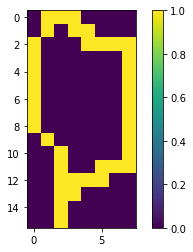

In [4]:
print("Letter:", chr(int(labels[2500])))

im = features[2500]
for row in im:
    row.astype(np.uint8)
    
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.show()


## Models

### Artifical Neural Network (ANN)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(16, 8)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(127)
])


In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
training = model.fit(features, labels, validation_split = 0.2, epochs=10)

Epoch 1/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8980 - val_loss: 0.4781 - val_accuracy: 0.8635
Epoch 2/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.3158 - accuracy: 0.8985 - val_loss: 0.4603 - val_accuracy: 0.8644
Epoch 3/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.9007 - val_loss: 0.4672 - val_accuracy: 0.8652
Epoch 4/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.9014 - val_loss: 0.4696 - val_accuracy: 0.8651
Epoch 5/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.9023 - val_loss: 0.4599 - val_accuracy: 0.8673
Epoch 6/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.9041 - val_loss: 0.4881 - val_accuracy: 0.8617
Epoch 7/10
1304/1304 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.9024 - val_loss: 0.4651 - val_accuracy:

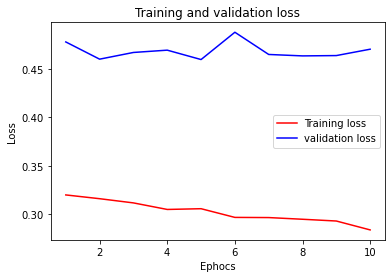

In [22]:

loss_train = training.history['loss']
loss_val = training.history['val_loss']
ephocs = range(1,11)

plt.plot(ephocs, loss_train, 'r',label = 'Training loss')
plt.plot(ephocs,loss_val, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Ephocs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Convolutional Neural Network (CNN)

In [9]:
features_reshaped = features.reshape(52152, 16, 8, 1)

52152


In [11]:
CNN = tf.keras.models.Sequential()
CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (16,8,1)))
CNN.add(tf.keras.layers.MaxPooling2D((1,1)))
CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
CNN.add(tf.keras.layers.MaxPooling2D((1,1)))
CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(64, activation='relu'))
CNN.add(tf.keras.layers.Dense(127))

In [12]:
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

training2 = CNN.fit(features_reshaped, labels,validation_split = 0.2, epochs=10)

Epoch 1/10
1304/1304 [==============================] - 22s 17ms/step - loss: 0.8365 - accuracy: 0.7641 - val_loss: 0.5843 - val_accuracy: 0.8215
Epoch 2/10
1304/1304 [==============================] - 22s 17ms/step - loss: 0.3910 - accuracy: 0.8785 - val_loss: 0.4489 - val_accuracy: 0.8673
Epoch 3/10
1304/1304 [==============================] - 21s 16ms/step - loss: 0.3113 - accuracy: 0.9016 - val_loss: 0.3912 - val_accuracy: 0.8801
Epoch 4/10
1304/1304 [==============================] - 22s 17ms/step - loss: 0.2685 - accuracy: 0.9129 - val_loss: 0.3540 - val_accuracy: 0.8913
Epoch 5/10
1304/1304 [==============================] - 22s 17ms/step - loss: 0.2391 - accuracy: 0.9219 - val_loss: 0.3451 - val_accuracy: 0.8973
Epoch 6/10
1304/1304 [==============================] - 21s 16ms/step - loss: 0.2140 - accuracy: 0.9282 - val_loss: 0.3688 - val_accuracy: 0.8923
Epoch 7/10
1304/1304 [==============================] - 21s 16ms/step - loss: 0.1899 - accuracy: 0.9356 - val_loss: 0.3527 -

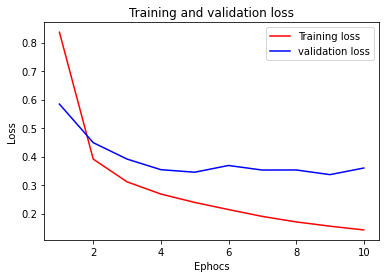

In [13]:
loss_train = training2.history['loss']
loss_val = training2.history['val_loss']
ephocs = range(1,11)

plt.plot(ephocs, loss_train, 'r',label = 'Training loss')
plt.plot(ephocs,loss_val, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Ephocs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Recurrent Neural Network (RNN)

In [17]:
RNN = tf.keras.models.Sequential()
RNN.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(16,8)))
RNN.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
RNN.add(tf.keras.layers.Dense(127))

In [18]:
RNN.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)
training3 = RNN.fit(features, labels,validation_split = 0.2, epochs=10)


Epoch 1/10


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fa7bb7d9820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/weakref.py", line 345, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


1304/1304 [==============================] - 75s 58ms/step - loss: 1.3998 - accuracy: 0.6137 - val_loss: 0.9158 - val_accuracy: 0.7437
Epoch 2/10
1304/1304 [==============================] - 67s 51ms/step - loss: 0.6243 - accuracy: 0.8193 - val_loss: 0.6561 - val_accuracy: 0.8059
Epoch 3/10
1304/1304 [==============================] - 68s 52ms/step - loss: 0.4717 - accuracy: 0.8598 - val_loss: 0.5782 - val_accuracy: 0.8276
Epoch 4/10
1304/1304 [==============================] - 67s 52ms/step - loss: 0.3976 - accuracy: 0.8803 - val_loss: 0.4962 - val_accuracy: 0.8532
Epoch 5/10
1304/1304 [==============================] - 66s 51ms/step - loss: 0.3542 - accuracy: 0.8916 - val_loss: 0.4524 - val_accuracy: 0.8633
Epoch 6/10
1304/1304 [==============================] - 65s 50ms/step - loss: 0.3187 - accuracy: 0.9003 - val_loss: 0.4279 - val_accuracy: 0.8705
Epoch 7/10
1304/1304 [==============================] - 64s 49ms/step - loss: 0.2908 - accuracy: 0.9082 - val_loss: 0.4131 - val_accura

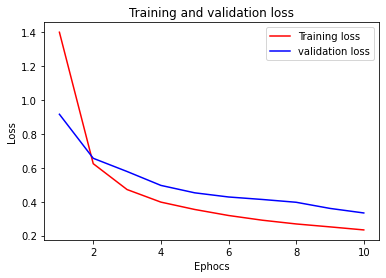

In [19]:
loss_train = training3.history['loss']
loss_val = training3.history['val_loss']
ephocs = range(1,11)

plt.plot(ephocs, loss_train, 'r',label = 'Training loss')
plt.plot(ephocs,loss_val, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Ephocs')
plt.ylabel('Loss')
plt.legend()
plt.show()
